<a href="https://colab.research.google.com/github/YilBC/TalentoYB/blob/main/05_TSeriesTiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import pandas_datareader as dr
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta
%matplotlib inline
plt.style.use("ggplot")

In [3]:
t = np.array(range(1990,2004))
ingresos = np.array([1202.02, 1262.13, 1232.07, 1382.33, 1322.23, 1352.28, 1346.27, 1370.31, 1479.93, 1553.93, 1538.39, 1523.01, 1561.08, 1607.91])

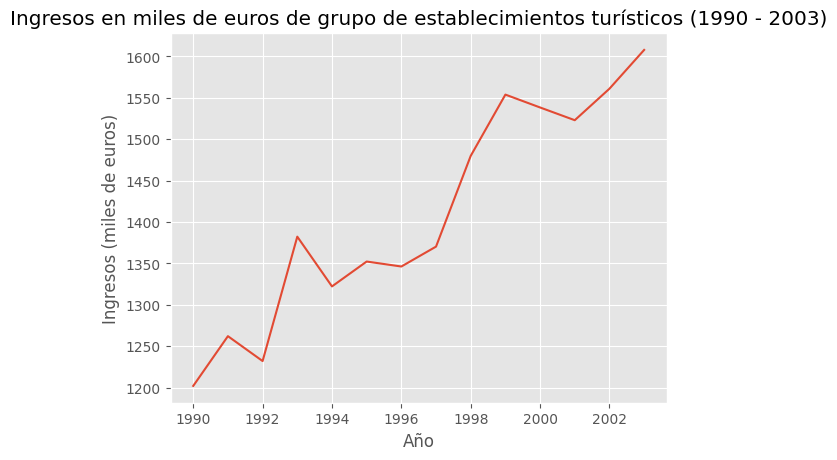

In [4]:
plt.plot(t,ingresos)
plt.title('Ingresos en miles de euros de grupo de establecimientos turísticos (1990 - 2003)')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de euros)')
plt.show()

In [5]:
# Hacer media móvil para n = 3
n = 3 #cantidad de elementos que se utilizarán para calcular la media móvil
k = len(ingresos)
mmovil = np.empty(k)
mmovil[:] = np.nan
ini = 0

for i in range(n-1,k):
  mmovil[i] = np.sum(ingresos[ini:i+1])/n
  ini += 1
mmovil

array([          nan,           nan, 1232.07333333, 1292.17666667,
       1312.21      , 1352.28      , 1340.26      , 1356.28666667,
       1398.83666667, 1468.05666667, 1524.08333333, 1538.44333333,
       1540.82666667, 1564.        ])

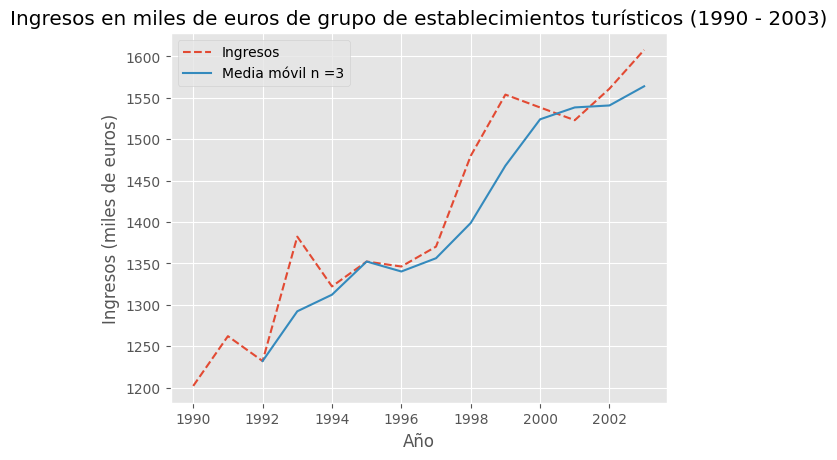

In [6]:
plt.plot(t,ingresos, '--', label='Ingresos')
plt.plot(t,mmovil, label='Media móvil n =3')
plt.title('Ingresos en miles de euros de grupo de establecimientos turísticos (1990 - 2003)')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de euros)')
plt.legend()
plt.show()

#Ejercicio medias móviles 1
Cree una función que reciba como argumentos la serie temporal de ingresos y el número *n*. A partir de esta función calcule la media móvil para *n=4* y haga un gráfico comparativo entre el valor de los ingresos, la media móvil *n=3* y la media móvil *n=4*.

In [7]:
df_ingresos = pd.DataFrame({'year':t,'ingresos':ingresos})
df_ingresos.set_index('year')
df_ingresos.head()

,year,ingresos
0,1990,1202.02
1,1991,1262.13
2,1992,1232.07
3,1993,1382.33
4,1994,1322.23


In [8]:
df_ingresos['mmovil'] = df_ingresos['ingresos'].rolling(3).mean()
df_ingresos.head()

,year,ingresos,mmovil
0,1990,1202.02,NaN
1,1991,1262.13,NaN
2,1992,1232.07,1232.073333
3,1993,1382.33,1292.176667
4,1994,1322.23,1312.210000


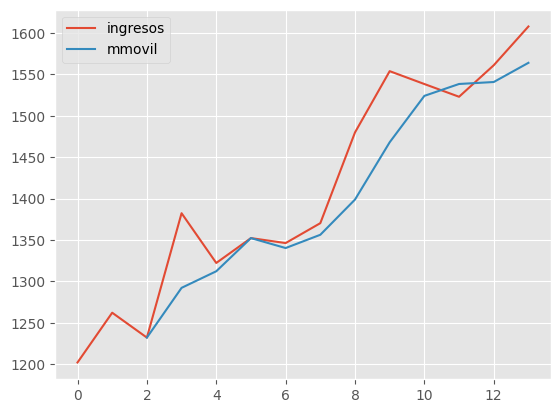

In [9]:
df_ingresos[['ingresos','mmovil']].plot();

##Ejemplo estacionalidad 1

In [10]:
est = ingresos - mmovil
est

array([            nan,             nan, -3.33333333e-03,  9.01533333e+01,
        1.00200000e+01,  0.00000000e+00,  6.01000000e+00,  1.40233333e+01,
        8.10933333e+01,  8.58733333e+01,  1.43066667e+01, -1.54333333e+01,
        2.02533333e+01,  4.39100000e+01])

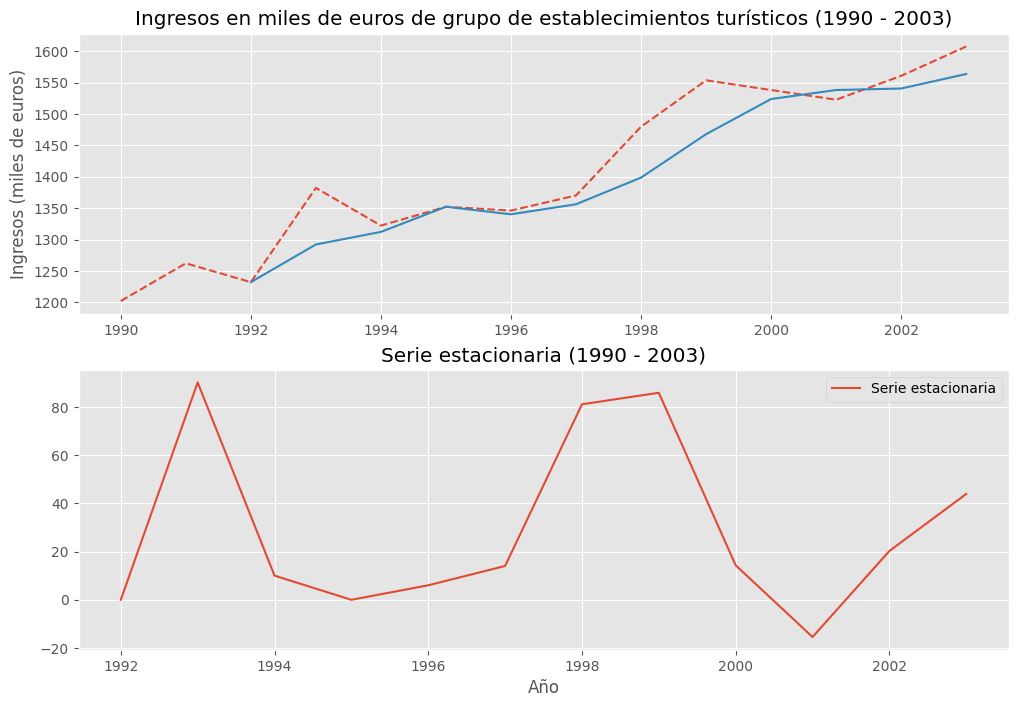

In [11]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(t,ingresos, '--', label='Ingresos')
plt.plot(t,mmovil, label='Media móvil n =3')
plt.title('Ingresos en miles de euros de grupo de establecimientos turísticos (1990 - 2003)')
plt.ylabel('Ingresos (miles de euros)')
plt.subplot(212)
plt.plot(t,est, '-',label='Serie estacionaria')
plt.title('Serie estacionaria (1990 - 2003)')
plt.xlabel('Año')
plt.legend()
plt.show()

##Ejercicio estacionalidad

In [12]:
!pip install pydataset
from pydataset import data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 71.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939417 sha256=7d5de8ea35dbf174664b6b5ce2451e418eb42b83aba1a5634de1c323608c3e8b
  Stored in directory: /root/.cache/pip/wheels/2b/83/5c/073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset
initiated datasets repo at: /root/.pydataset/


In [13]:
co2 = data('co2')
co2

,time,co2
1,1959.000000,315.42
2,1959.083333,316.31
3,1959.166667,316.50
4,1959.250000,317.56
5,1959.333333,318.13
...,...,...
464,1997.583333,362.57
465,1997.666667,360.24
466,1997.750000,360.83
467,1997.833333,362.49


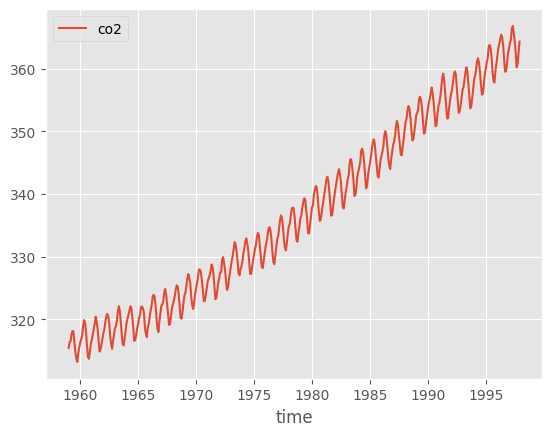

In [14]:
co2.plot(x='time');

Calcule la estacionalidad con *n=30. (y(t)-T(t)=E(t)+A(t))*

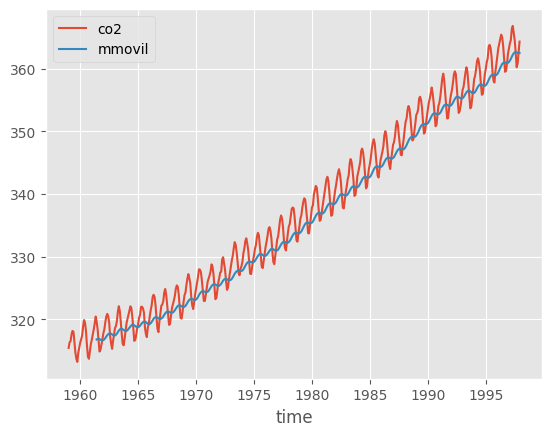

In [15]:
# Escriba su código aquí
n = 30
co2['mmovil'] = co2['co2'].rolling(n).mean()
co2.plot(x='time');

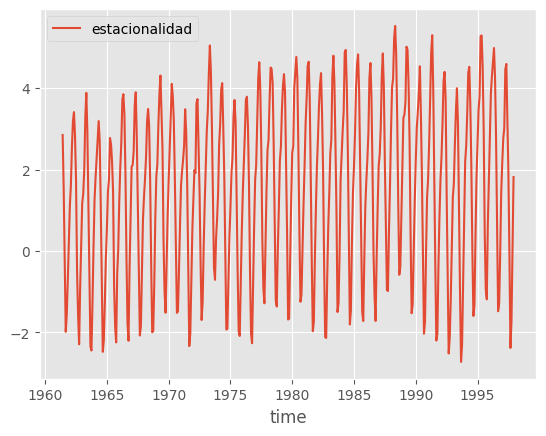

In [16]:
co2['estacionalidad'] = co2['co2'] - co2['mmovil']
co2[['time','estacionalidad']].plot(x='time');

In [17]:
import statsmodels.api as sm
descomposicion = sm.tsa.seasonal_decompose(co2['co2'],model='aditive', period=30)

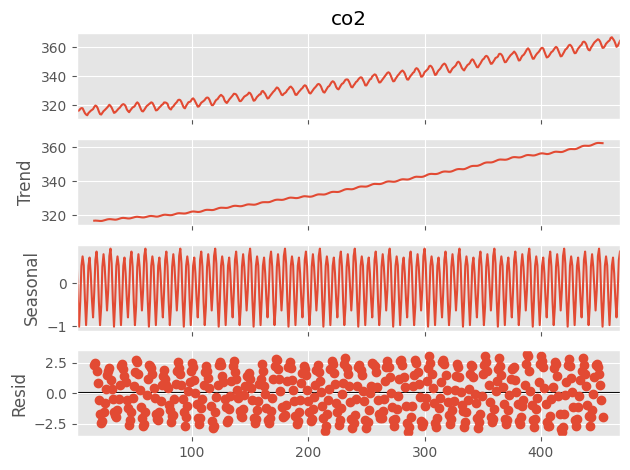

In [18]:
descomposicion.plot();

##Ejercicio índice de variación estacional y desestacionalización.
A Partir de los datos trimestrales de emisión de CO2 en el perido 1959 - 1997, realice la desestacionalización de la serie.

In [19]:
# función para transformar los datos a valores trimestrales.
def get_trimestre(t):
  dt = t - int(t)
  if dt <= 0.25:
    trimestre = 1
  elif dt > 0.25 and dt <= 0.5:
    trimestre = 2
  elif dt > 0.5 and dt <= 0.75:
    trimestre = 3
  else:
    trimestre = 4
  return trimestre

co2 = data('co2')
co2['year'] = co2['time'].apply(lambda t: int(t))
co2['trimestre'] = co2['time'].apply(get_trimestre)
co2_trim = co2[['year','trimestre','co2']].groupby(['year','trimestre'],\
                                        as_index=False).mean()

In [20]:
co2_trim.tail()

,year,trimestre,co2
151,1996,4,360.943333
152,1997,1,363.966667
153,1997,2,366.306667
154,1997,3,362.443333
155,1997,4,362.553333


Encuentren la tendencia y generen la serie con la estacionalidad y la componente aleatoria.

<Axes: >

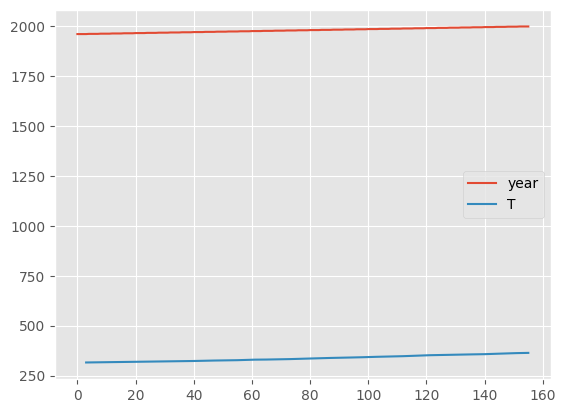

In [21]:
# Escriba su código aquí
co2_trim["T"] = co2_trim["co2"].rolling(4) .mean()
co2_trim[["year" , "T"]].plot()

<Axes: xlabel='year'>

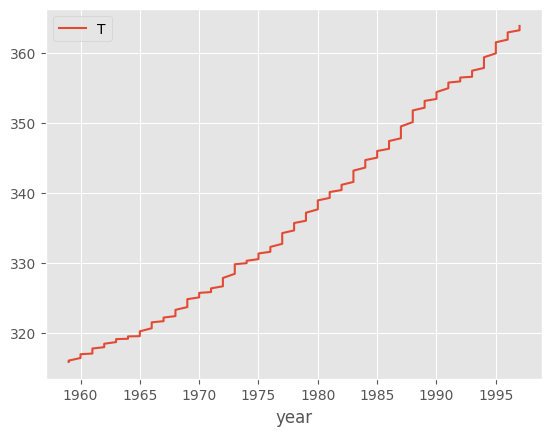

In [22]:
co2_trim["T"] = co2_trim["co2"].rolling(4, center=True) .mean()
co2_trim[["year", "T"]].plot(x="year")

In [23]:
co2["T"] = co2_trim["co2"].rolling(4, center=True).mean()
co2_trim["EA"] = co2_trim["co2"]/co2_trim["T"]

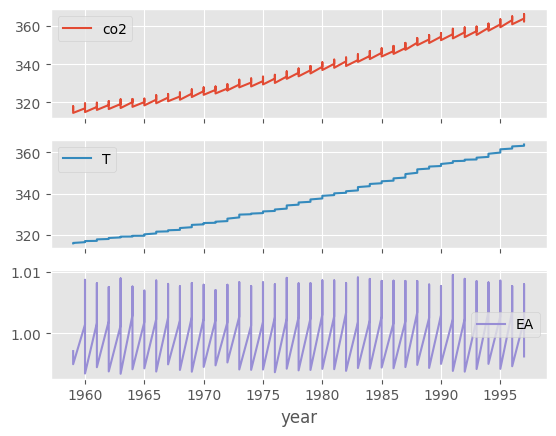

In [24]:
co2_trim[["year", "co2" , "T" , "EA"]].plot(x="year", subplots=True);

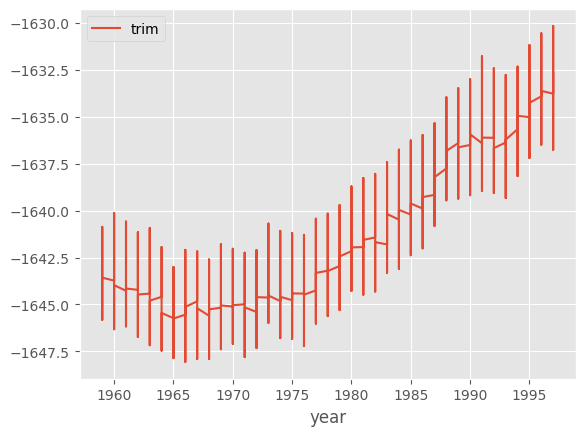

In [25]:
co2['trim'] = co2['co2'] - co2['year']
co2[['year','trim']].plot(x='year');

Calcule los índices IBVE e IVE

In [26]:
# Escriba su código aquí
co2_trim.head(10)

,year,trimestre,co2,T,EA
0,1959,1,316.076667,NaN,NaN
1,1959,2,317.896667,NaN,NaN
2,1959,3,314.906667,315.825833,0.997090
3,1959,4,314.423333,316.015000,0.994963
4,1960,1,316.833333,316.388333,1.001406
5,1960,2,319.390000,316.640833,1.008682
6,1960,3,315.916667,316.747500,0.997377
7,1960,4,314.850000,316.926667,0.993447
8,1961,1,317.550000,317.024167,1.001659
9,1961,2,319.780000,317.201667,1.008128


In [27]:
ibve = co2_trim[["trimestre","EA"]].groupby("trimestre",as_index=False).mean()
ibve

,trimestre,EA
0,1,1.002373
1,2,1.008219
2,3,0.997002
3,4,0.994252


Encuentre la serie desestacionada.

In [28]:
ibve = co2_trim[['trimestre','EA']].groupby('trimestre',as_index=False).mean()
ibve.rename(columns={'EA':'ibve'}, inplace=True)
ibve_mean = ibve['ibve'].mean()
ibve['ive'] = ibve['ibve']/ibve_mean
ibve

,trimestre,ibve,ive
0,1,1.002373,1.001911
1,2,1.008219,1.007754
2,3,0.997002,0.996542
3,4,0.994252,0.993793


In [29]:
def desestacionar_serie(y,ive):
  trim = int(y[0])
  co2 = y[1]
  return co2/ive[trim-1]

Aplique el modelo de regresión lineal para predecir el valor de la serie en el primer trimestre de 1998.

In [30]:
# Escriba su código aquí
y = np.array(co2_trim["desestacional"])
x = np.array(range(0,len(y)))
regresion = stats.linregress(x,y)
b = regresion.slope #y = a + bx
a = regresion.intercept
print(f"pendiente: {b}")
print(f"intercepto: {a}")
yrl = a + b*x
co2_trim["regresion"] = yrl

KeyError: 'desestacional'

Realice la gráfica de la regresión lineal

In [ ]:
import statsmodels.api as sm
descomposicion = sm.tsa.seasonal_decompose(co2_trim['co2'],model='multiplicative',\
                                           freq=4)
descomposicion.plot();

TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'

##Ejemplo uso de la función ARIMA en python

In [31]:
!pip install yfinance --upgrade --no-cache-dir
!pip install pandas-datareader --upgrade --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.1/101.1 kB 79.9 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.46
    Uninstalling yfinance-0.2.46:
      Successfully uninstalled yfinance-0.2.46


In [32]:
import yfinance as yf
import pandas as pd
from datetime import datetime

In [33]:
# Creando una serie de tiempo de las acciones de WFT desde yahoo finance
#dr.data.get_data_yahoo(Activo, start=FechaInicio, end=FechaFinal)
from datetime import date
Activo = 'AAPL'
FechaInicio = '2024-01-01'
FechaFinal = '2024-06-30'
apple = yf.download(Activo, start=FechaInicio, end=FechaFinal)
#apple = dr.data.get_data_yahoo(Activo, start=FechaInicio, end=FechaFinal)
apple.index = apple.index.to_period('D')
apple.head(5)

[*********************100%***********************]  1 of 1 completed
<ipython-input-33-6c1661c74fb1>:9: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  apple.index = apple.index.to_period('D')


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2024-01-02,184.938217,185.639999,188.440002,183.889999,187.149994,82488700
2024-01-03,183.553467,184.250000,185.880005,183.429993,184.220001,58414500
2024-01-04,181.222321,181.910004,183.089996,180.880005,182.149994,71983600
2024-01-05,180.495087,181.179993,182.759995,180.169998,181.990005,62303300
2024-01-08,184.858521,185.559998,185.600006,181.500000,182.089996,59144500


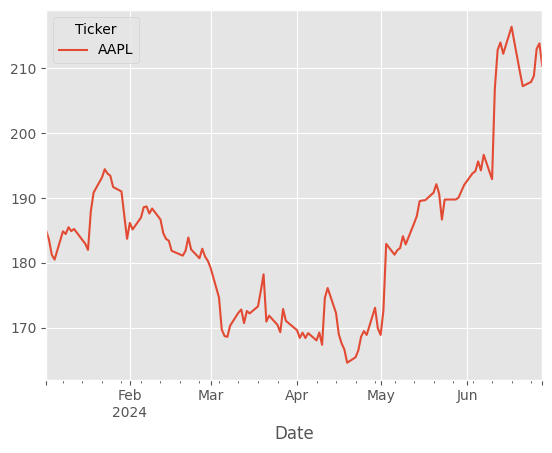

In [34]:
apple['Adj Close'].plot();

In [35]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/optimizer.py:19: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: trend. After release 0.14, this will raise.
  warnings.warn(


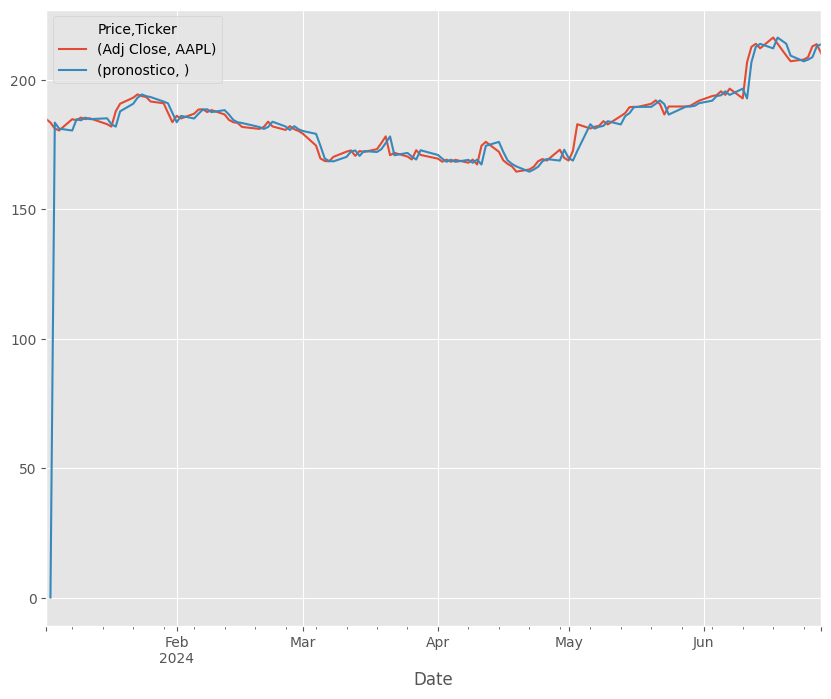

In [36]:
modelo = SARIMAX(apple['Adj Close'].iloc[1:], order=(1,0,0))
resultados = modelo.fit(disp=-1, trend='nc')
apple['pronostico'] = resultados.fittedvalues
plot = apple[['Adj Close', 'pronostico']].plot(figsize=(10, 8));